# House Price: Advanced regression technique

### Deep learning model: Keras

In [27]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt


In [30]:
df = pd.read_csv('./data/HousePrice_preprocessing_full_ver7.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,SaleCondition,SalePrice
0,1,0.073350,1,65.0,-0.207071,0.75,0.875,1,0.75,1,...,0.1,0.5,0.833333,-0.751918,0.216429,-0.359202,-0.270116,1,1,208500
1,2,-0.872264,1,80.0,-0.091855,0.75,0.875,1,0.75,2,...,0.1,0.5,0.833333,1.625638,-0.704242,-0.359202,-0.270116,1,1,181500
2,3,0.073350,1,68.0,0.073455,0.75,0.625,1,0.75,1,...,0.1,0.5,0.833333,-0.751918,-0.070337,-0.359202,-0.270116,1,1,223500
3,4,0.309753,1,60.0,-0.096864,0.75,0.625,1,0.75,3,...,0.1,0.5,0.833333,-0.751918,-0.175988,4.091122,-0.270116,1,2,140000
4,5,0.073350,1,84.0,0.375020,0.75,0.625,1,0.75,2,...,0.1,0.5,0.833333,0.779930,0.563567,-0.359202,-0.270116,1,1,250000


In [31]:
# seed 값 설정
seed = 0
np.random.seed(seed)
# Scaler
scale = StandardScaler()
x_train = df
x_train = scale.fit_transform(x_train)

y = df['SalePrice'].values

x_train, x_test, y_train, y_test = train_test_split(x_train, y, test_size = 0.3, random_state = seed)

In [32]:
# 모델링
model = Sequential()
model.add(Dense(10, input_dim = x_train.shape[1], activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(40, activation = 'relu'))
model.add(Dense(1))
# 모델 compile
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = [metrics.mae])

In [33]:
# 모델 fitting
hist = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 200, batch_size = 10)

Train on 1022 samples, validate on 438 samples
Epoch 1/200
1022/1022 [==============================] - 1s 914us/step - loss: 38707938638.6536 - mean_absolute_error: 180577.7145 - val_loss: 39790150015.4155 - val_mean_absolute_error: 181666.7624
Epoch 2/200
1022/1022 [==============================] - 0s 329us/step - loss: 38604117691.3660 - mean_absolute_error: 180335.3916 - val_loss: 39467389461.0411 - val_mean_absolute_error: 180955.6433
Epoch 3/200
1022/1022 [==============================] - 0s 334us/step - loss: 37719506599.3268 - mean_absolute_error: 178359.9855 - val_loss: 37609213989.4064 - val_mean_absolute_error: 176931.7674
Epoch 4/200
1022/1022 [==============================] - 0s 339us/step - loss: 34391800900.1331 - mean_absolute_error: 170863.5270 - val_loss: 32152351842.1918 - val_mean_absolute_error: 164500.8010
Epoch 5/200
1022/1022 [==============================] - 0s 344us/step - loss: 27185396289.1272 - mean_absolute_error: 152745.0295 - val_loss: 22725364656.51

1022/1022 [==============================] - 0s 175us/step - loss: 881871765.3229 - mean_absolute_error: 21545.1135 - val_loss: 2082419644.3470 - val_mean_absolute_error: 26949.3765
Epoch 43/200
1022/1022 [==============================] - 0s 218us/step - loss: 861432952.3914 - mean_absolute_error: 21438.5823 - val_loss: 2011916372.3836 - val_mean_absolute_error: 26727.7166
Epoch 44/200
1022/1022 [==============================] - 0s 213us/step - loss: 847867298.5205 - mean_absolute_error: 21167.6943 - val_loss: 1988498503.0137 - val_mean_absolute_error: 26442.6038
Epoch 45/200
1022/1022 [==============================] - 0s 220us/step - loss: 825292084.2740 - mean_absolute_error: 20855.1458 - val_loss: 1959833089.7900 - val_mean_absolute_error: 26223.2589
Epoch 46/200
1022/1022 [==============================] - 0s 229us/step - loss: 804644591.7808 - mean_absolute_error: 20551.8474 - val_loss: 1954408100.3105 - val_mean_absolute_error: 26012.8409
Epoch 47/200
1022/1022 [==============

Epoch 84/200
1022/1022 [==============================] - 0s 179us/step - loss: 352629873.8552 - mean_absolute_error: 13650.3397 - val_loss: 1113982202.7032 - val_mean_absolute_error: 19198.5838
Epoch 85/200
1022/1022 [==============================] - 0s 174us/step - loss: 346872539.2407 - mean_absolute_error: 13530.4726 - val_loss: 1105219865.4977 - val_mean_absolute_error: 19050.7796
Epoch 86/200
1022/1022 [==============================] - 0s 184us/step - loss: 338968384.4618 - mean_absolute_error: 13309.3798 - val_loss: 1083567006.7215 - val_mean_absolute_error: 19011.2803
Epoch 87/200
1022/1022 [==============================] - 0s 182us/step - loss: 334957094.8885 - mean_absolute_error: 13281.6451 - val_loss: 1069831699.5434 - val_mean_absolute_error: 18800.5180
Epoch 88/200
1022/1022 [==============================] - ETA: 0s - loss: 299575562.5882 - mean_absolute_error: 12728.288 - 0s 182us/step - loss: 323643475.9002 - mean_absolute_error: 13066.8881 - val_loss: 1073756274.19

Epoch 126/200
1022/1022 [==============================] - 0s 175us/step - loss: 145659255.5460 - mean_absolute_error: 8590.7517 - val_loss: 603745935.1050 - val_mean_absolute_error: 14179.9760
Epoch 127/200
1022/1022 [==============================] - 0s 176us/step - loss: 141423405.9804 - mean_absolute_error: 8487.6029 - val_loss: 589998323.0685 - val_mean_absolute_error: 14050.5748
Epoch 128/200
1022/1022 [==============================] - 0s 178us/step - loss: 138243782.7984 - mean_absolute_error: 8379.1162 - val_loss: 582617539.3242 - val_mean_absolute_error: 13937.4804
Epoch 129/200
1022/1022 [==============================] - 0s 175us/step - loss: 134406490.8650 - mean_absolute_error: 8245.8000 - val_loss: 570711329.9726 - val_mean_absolute_error: 13843.3688
Epoch 130/200
1022/1022 [==============================] - 0s 162us/step - loss: 131196827.3894 - mean_absolute_error: 8168.7615 - val_loss: 564215752.8037 - val_mean_absolute_error: 13730.2747
Epoch 131/200
1022/1022 [=====

1022/1022 [==============================] - 0s 161us/step - loss: 56503205.9462 - mean_absolute_error: 5090.7041 - val_loss: 324582657.6256 - val_mean_absolute_error: 10094.8152
Epoch 169/200
1022/1022 [==============================] - 0s 167us/step - loss: 55667571.2681 - mean_absolute_error: 5073.2692 - val_loss: 321206165.7580 - val_mean_absolute_error: 9983.9169
Epoch 170/200
1022/1022 [==============================] - 0s 184us/step - loss: 54929868.1409 - mean_absolute_error: 5044.2500 - val_loss: 319132601.1507 - val_mean_absolute_error: 9940.4518
Epoch 171/200
1022/1022 [==============================] - 0s 188us/step - loss: 53247654.8836 - mean_absolute_error: 4955.9349 - val_loss: 317438206.9954 - val_mean_absolute_error: 9896.1032
Epoch 172/200
1022/1022 [==============================] - 0s 171us/step - loss: 52965805.6556 - mean_absolute_error: 4976.5316 - val_loss: 314943414.5936 - val_mean_absolute_error: 9910.6442
Epoch 173/200
1022/1022 [============================

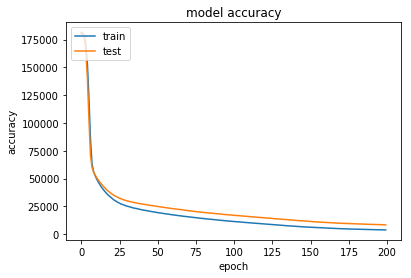

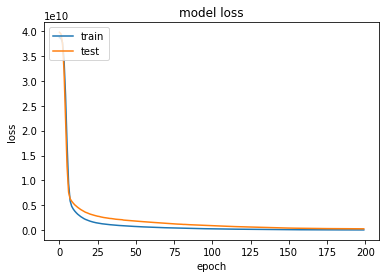

In [34]:
# summarize : accuracy
plt.plot(hist.history['mean_absolute_error'])
plt.plot(hist.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()
# summarize : loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [35]:
# x_test vs. y_test
y_prediction = model.predict(x_test).flatten()
for i in range(20):
    label = y_test[i]
    prediction = y_prediction[i]
    
    print('실제가격 : {:.3f}, 예상가격 : {:.3f}'.format(label, prediction))
#     print('accuracy : {}, loss : {}'.format())


실제가격 : 200624.000, 예상가격 : 153995.500
실제가격 : 133000.000, 예상가격 : 158054.969
실제가격 : 110000.000, 예상가격 : 110648.695
실제가격 : 192000.000, 예상가격 : 190469.250
실제가격 : 88000.000, 예상가격 : 91877.609
실제가격 : 85000.000, 예상가격 : 100967.570
실제가격 : 282922.000, 예상가격 : 283923.000
실제가격 : 141000.000, 예상가격 : 149767.422
실제가격 : 745000.000, 예상가격 : 756344.125
실제가격 : 148800.000, 예상가격 : 160668.375
실제가격 : 208900.000, 예상가격 : 205841.156
실제가격 : 136905.000, 예상가격 : 163537.344
실제가격 : 225000.000, 예상가격 : 223012.031
실제가격 : 123000.000, 예상가격 : 137945.594
실제가격 : 119200.000, 예상가격 : 118392.805
실제가격 : 145000.000, 예상가격 : 147927.750
실제가격 : 190000.000, 예상가격 : 188630.750
실제가격 : 123600.000, 예상가격 : 108709.445
실제가격 : 149350.000, 예상가격 : 145217.766
실제가격 : 155000.000, 예상가격 : 149663.562
